# Creating netCDF files from a standard DataFrame

In [1]:
%matplotlib inline
from IPython.lib.pretty import pprint
import logging
logger = logging.getLogger('gutils')
logger.handlers = [logging.StreamHandler()]
logger.setLevel(logging.DEBUG)

def plot_profiles(default_df):
    import matplotlib.dates as mpd
    import matplotlib.pyplot as plt
    df = default_df.copy()
    df['z'] = df.z.values * -1
    df['t'] = mpd.date2num(df.t.dt.to_pydatetime())
    df.plot.scatter(x='t', y='z', c='profile', cmap='tab20')
    plt.show()

### Helper for creating standard DataFrame

('Filtered 5/11 profiles from /data/Development/secoora/sgs/GUTILS/gutils/tests/resources/slocum/usf_bass_2016_252_1_12_sbd.dat', 'Depth (1m): 4', 'Points (3): 1', 'Time (10s): 0', 'Distance (1m): 0')


Profiles :  6


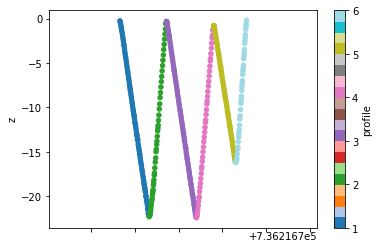

In [19]:
from pathlib import Path

from gutils.slocum import SlocumReader
from gutils.filters import process_dataset

ascii_folder = Path('.').absolute().parent.parent / 'gutils' / 'tests' / 'resources' / 'slocum'
ascii_file = ascii_folder / 'usf_bass_2016_252_1_12_sbd.dat'

# Do it all in one shot
standard, mode = process_dataset(
    file=str(ascii_file),
    reader_class=SlocumReader,
    tsint=1,
    filter_z=1,
    filter_points=3,
    filter_time=10,
    filter_distance=1
)
print('Profiles : ', len(standard.profile.unique()))
plot_profiles(standard)

## Create netCDF from a default template

In [3]:
import tempfile
import netCDF4 as nc4
from gutils.nc import read_attrs, create_netcdf

# output folder
netcdf_output = tempfile.mkdtemp()

In [5]:
# Default "trajectory" metadata
default_attrs = read_attrs()

# The required attributes to identify a unique deployment
default_attrs['glider'] = 'bass'
default_attrs['trajectory_date'] = '20160909T1733'

list(default_attrs['variables'].keys())

['crs',
 'conductivity',
 'density',
 'depth',
 'm_altitude',
 'lat',
 'lat_uv',
 'lon',
 'lon_uv',
 'platform',
 'pressure',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'salinity',
 'temperature',
 'time',
 'time_uv',
 'trajectory',
 'u',
 'v',
 'u_orig',
 'v_orig',
 'sci_oxy3835_oxygen',
 'sci_oxy3835_wphase_oxygen',
 'sci_oxy3835_wphase_saturation',
 'sci_bbfl2s_chlor_scaled',
 'sci_flbbcd_chlor_units',
 'sci_flntu_chlor_units',
 'sci_flntu_turb_units',
 'sci_bbfl2s_cdom_scaled',
 'sci_flbbcd_cdom_units']

In [8]:
# Export the actual netCDF files
netcdf_files = create_netcdf(
    attrs=default_attrs,
    data=standard,
    output_path=netcdf_output,
    mode=mode
)
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Excluded from output (absent from JSON config):
  * m_leakdetect_voltage
  * m_water_depth
  * m_pitch
  * drv_m_gps_lon
  * m_battpos
  * m_gps_lat
  * m_vehicle_temp
  * m_battery
  * m_mission_avg_speed_climbing
  * m_heading
  * m_mission_avg_speed_diving
  * m_ballast_pumped
  * sci_water_pressure
  * m_lat
  * drv_m_gps_lat
  * c_wpt_lat
  * sci_bbfl2s_bb_scaled
  * m_depth
  * sci_m_present_time
  * m_roll
  * m_gps_lon
  * m_avg_speed
  * c_heading
  * m_vacuum
  * m_depth_rate
  * m_present_time
  * m_lon
Created: /tmp/tmp8nebo2lv/bass_20160909T165243Z_1473439963_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170019Z_1473440419_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170518Z_1473440718_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170805Z_1473440885_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T171146Z_1473441106_rt.nc


['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'm_altitude',
 'sci_bbfl2s_cdom_scaled',
 'sci_bbfl2s_chlor_scaled',
 'sci_oxy3835_oxygen',
 'conductivity',
 'temperature',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Create netCDF from an IOOS template

In [10]:
# IOOS NGDAC metadata
ioos_attrs = read_attrs(template='ioos_ngdac')

# The required attributes to identify a unique deployment
ioos_attrs['glider'] = 'bass'
ioos_attrs['trajectory_date'] = '20160909T1733'

list(ioos_attrs['variables'].keys())

['crs',
 'conductivity',
 'density',
 'depth',
 'lat',
 'lat_uv',
 'lon',
 'lon_uv',
 'platform',
 'pressure',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'salinity',
 'temperature',
 'time',
 'time_uv',
 'trajectory',
 'u',
 'v']

In [11]:
# Export the actual netCDF files
netcdf_files = create_netcdf(
    attrs=ioos_attrs,
    data=standard,
    output_path=netcdf_output,
    mode=mode
)
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Excluded from output (absent from JSON config):
  * m_leakdetect_voltage
  * m_water_depth
  * m_pitch
  * drv_m_gps_lon
  * m_battpos
  * m_gps_lat
  * m_vehicle_temp
  * m_battery
  * m_mission_avg_speed_climbing
  * m_heading
  * m_mission_avg_speed_diving
  * m_ballast_pumped
  * sci_water_pressure
  * m_lat
  * drv_m_gps_lat
  * c_wpt_lat
  * sci_bbfl2s_bb_scaled
  * m_depth
  * sci_bbfl2s_cdom_scaled
  * sci_m_present_time
  * m_roll
  * m_gps_lon
  * m_avg_speed
  * c_heading
  * m_vacuum
  * m_depth_rate
  * m_present_time
  * sci_oxy3835_oxygen
  * sci_bbfl2s_chlor_scaled
  * m_lon
  * m_altitude
Created: /tmp/tmp8nebo2lv/bass_20160909T165243Z_1473439963_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170019Z_1473440419_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170518Z_1473440718_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170805Z_1473440885_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T171146Z_1473441106_rt.

['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'conductivity',
 'temperature',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Create netCDF without subsetting any variables

By default only variables that have metadata defined for them are exported


In [13]:
# Export the actual netCDF files, no subset
netcdf_files = create_netcdf(
    attrs=default_attrs,
    data=standard,
    output_path=netcdf_output,
    subset=False,
    mode=mode
)
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Created: /tmp/tmp8nebo2lv/bass_20160909T165243Z_1473439963_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170019Z_1473440419_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170518Z_1473440718_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T170805Z_1473440885_rt.nc
Created: /tmp/tmp8nebo2lv/bass_20160909T171146Z_1473441106_rt.nc


['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'c_heading',
 'c_wpt_lat',
 'm_altitude',
 'm_avg_speed',
 'm_ballast_pumped',
 'm_battery',
 'm_battpos',
 'm_depth',
 'm_depth_rate',
 'm_gps_lat',
 'm_gps_lon',
 'm_heading',
 'm_lat',
 'm_leakdetect_voltage',
 'm_lon',
 'm_mission_avg_speed_climbing',
 'm_mission_avg_speed_diving',
 'm_pitch',
 'm_present_time',
 'm_roll',
 'm_vacuum',
 'm_vehicle_temp',
 'm_water_depth',
 'sci_bbfl2s_bb_scaled',
 'sci_bbfl2s_cdom_scaled',
 'sci_bbfl2s_chlor_scaled',
 'sci_m_present_time',
 'sci_oxy3835_oxygen',
 'conductivity',
 'sci_water_pressure',
 'temperature',
 'drv_m_gps_lat',
 'drv_m_gps_lon',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Produced netCDF files have metadata automatically calculated

In [14]:
with nc4.Dataset(netcdf_files[0]) as first_profile:
    print(first_profile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    featureType: trajectory
    date_created: 2017-11-06T19:46:02Z
    cdm_data_type: trajectory
    Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    format_version: IOOS_Glider_NetCDF_v3.0-noqartod.nc
    keywords: AUVS > Autonomous Underwater Vehicles, Oceans > Ocean Pressure > Water Pressure, Oceans > Ocean Temperature > Water Temperature, Oceans > Salinity/Density > Conductivity, Oceans > Salinity/Density > Density, Oceans > Salinity/Density > Salinity
    keywords_vocabulary: GCMD Science Keywords
    license: This data may be redistributed and used without restriction.  Data provided as is with no expressed or implied assurance of quality assurance or quality control
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    platform_type: Slocum Glider
    processing_level: Dataset taken from glider native file format and is provided as is with no expressed or implied assurance

## Built-in compliance checker

In [15]:
from types import SimpleNamespace
from gutils.nc import check_dataset

In [16]:
# Good file will return 0
first = SimpleNamespace(file=netcdf_files[0])
check_dataset(first)

0

In [17]:
# Bad file will return 1 and log the errors
bad = SimpleNamespace(file=str(ascii_folder.parent / 'should_fail.nc'))
check_dataset(bad)

gliderdac.check_primary_variable_attributes: 'pressure'
  File "/home/kwilcox/miniconda3-py36/envs/gutils35/lib/python3.5/site-packages/cc_plugin_glider/glider_dac.py", line 336, in check_primary_variable_attributes
    test = hasattr(dataset.variables[var], attribute)



1

## Full circle back to a DataFrame

In [18]:
from pocean.dsg import IncompleteMultidimensionalTrajectory as imt

with imt(netcdf_files[1]) as ncd:
    df = ncd.to_dataframe(axes={
        't': 'time',
        'z': 'depth',
        'x': 'lon',
        'y': 'lat'
    })
df.head(20)

,time,lon,lat,depth,trajectory,crs,m_ballast_pumped,m_battpos,m_depth,m_depth_rate,...,conductivity,sci_water_pressure,temperature,pressure,salinity,density,profile_id,profile_lat,profile_lon,profile_time
0,2016-09-09 16:57:32.110840,-80.298008,28.368306,22.288953,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57568,2.244,26.1661,22.44,36.058043,1023.878204,1473440252,28.368492,-80.297931,8.422883e+08
1,2016-09-09 16:57:33.152860,-80.298007,28.368308,NaN,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1473440252,28.368492,-80.297931,8.422883e+08
2,2016-09-09 16:57:33.543910,-80.298007,28.368308,NaN,bass-20160909T1733,0.0,NaN,NaN,22.4166,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1473440252,28.368492,-80.297931,8.422883e+08
3,2016-09-09 16:57:36.266660,-80.298004,28.368315,22.199564,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57492,2.235,26.1712,22.35,36.048522,1023.869030,1473440252,28.368492,-80.297931,8.422883e+08
4,2016-09-09 16:57:38.257110,-80.298002,28.368320,NaN,bass-20160909T1733,0.0,138.571,NaN,22.3583,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1473440252,28.368492,-80.297931,8.422883e+08
5,2016-09-09 16:57:38.714020,-80.298002,28.368320,22.120107,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57575,2.227,26.1795,22.27,36.048077,1023.865736,1473440252,28.368492,-80.297931,8.422883e+08
6,2016-09-09 16:57:40.990780,-80.298000,28.368325,22.040650,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57473,2.219,26.1798,22.19,36.040431,1023.859532,1473440252,28.368492,-80.297931,8.422883e+08
7,2016-09-09 16:57:42.928130,-80.297998,28.368330,NaN,bass-20160909T1733,0.0,NaN,NaN,22.1016,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1473440252,28.368492,-80.297931,8.422883e+08
8,2016-09-09 16:57:44.399540,-80.297996,28.368335,21.822142,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57489,2.197,26.2188,21.97,36.011053,1023.824139,1473440252,28.368492,-80.297931,8.422883e+08
9,2016-09-09 16:57:46.747740,-80.297994,28.368339,21.603634,bass-20160909T1733,0.0,NaN,NaN,NaN,NaN,...,5.57698,2.175,26.2516,21.75,36.000620,1023.804980,1473440252,28.368492,-80.297931,8.422883e+08
